In [2]:
# This notebook runs a test code
import numpy as np
import matplotlib.pyplot as plt
import random 

# load in custom library
import lunar_processes as pr

# for testing time
import time


In [39]:
def LOLA(lat, long, data):
    # grab the RMS slope at that lat, long
    # w, h: 2880, 5760 
    # one row for each 0.0625 degrees of latitude
    res = 0.0625
    lat_d = np.rad2deg(lat)
    print(lat_d)
    long_d = np.rad2deg(long)
    print(long_d)
    X = int(long_d/res)
    Y = int((lat_d+90)/res)
    print(X, Y)
    omega = data[X, Y]
    return omega

In [3]:
loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/Data/'
filename = 'MAS_57M_16.img'

# set width and height 
w, h = 2880, 5760 

with open(loc+filename, 'rb') as f: 
    img = np.fromfile(f, dtype=np.int16).reshape(w, h)

In [58]:
rough = LOLA(np.deg2rad(-90), np.deg2rad(0), pr.omegas.T) 
print(rough, img[int(w/2), int(h/2)]*0.0015+45)
print(rough, img[int(0), int(0)]*0.0015+45)



-90.0
0.0
0 0
(5760, 2880)
1.8164999999999978 3.0
1.8164999999999978 1.8164999999999978


185.9414146968481
0
2
4
6
8
10
12
14
16
18
20
22


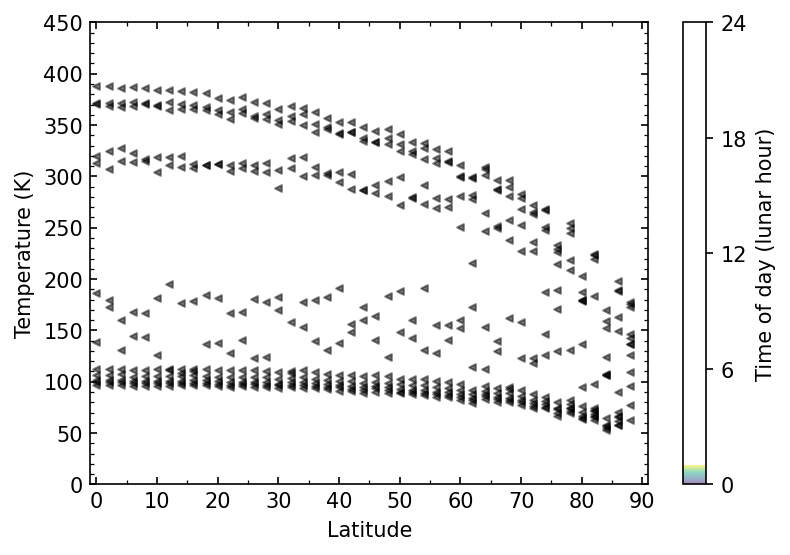

In [24]:
lat = np.deg2rad(89)
long = np.deg2rad(1)
tod = 10
print(pr.roughT(lat, long, tod, pr.data, img))

plt.figure(figsize=(6, 4), dpi=150)
for j in range(0, 24, 2):
    print(j)
    for i in range(0, 90, 2):
        T = pr.roughT(np.deg2rad(i), long, j, pr.data, img)
        plt.scatter(i, T, s=5, alpha=0.5, c=j, cmap='twilight_shifted', vmin=0, vmax=24, zorder=10)
        #T_s, n = pr.DivinerT(np.deg2rad(i), long, j, pr.data)
        #plt.scatter(i, T_s, s=10, alpha=0.5, c='k', marker="<", zorder=0)
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.yticks(np.arange(0, 455, 50))
plt.yticks(np.arange(0, 455, 10), minor=True)
plt.ylim((0, 450))
plt.xticks(np.arange(0, 95, 10))
plt.xticks(np.arange(0, 95, 5), minor=True)
plt.xlim((-1, 91))
plt.tick_params(which='both', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=True, left=True, right=True, direction='in')
cbar = plt.colorbar(label="Time of day (lunar hour)")
cbar.set_ticks([0, 6, 12, 18, 24])
plt.show()

199.78929738811578
0
2
4
6
8
10
12
14
16
18
20
22


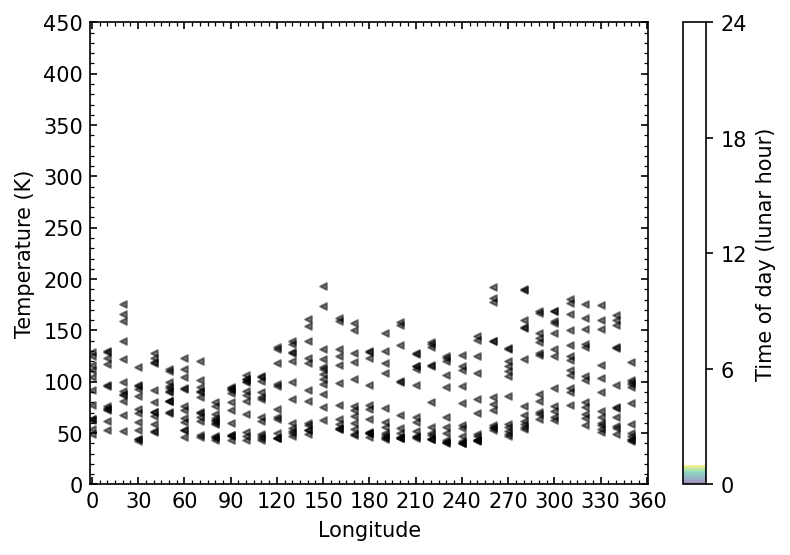

In [26]:
lat = np.deg2rad(89)
long = np.deg2rad(1)
tod = 10
print(pr.roughT(lat, long, tod, pr.data, img))

plt.figure(figsize=(6, 4), dpi=150)
for j in range(0, 24, 2):
    print(j)
    for i in range(0, 360, 10):
        T = pr.roughT(lat, np.deg2rad(i), j, pr.data, img)
        plt.scatter(i, T, s=5, alpha=0.5, c=j, cmap='twilight_shifted', vmin=0, vmax=24, zorder=10)
        #T_s, n = pr.DivinerT(lat, np.deg2rad(i), j, pr.data)
        #plt.scatter(i, T_s, s=10, alpha=0.5, c='k', marker="<", zorder=0)
plt.ylabel("Temperature (K)")
plt.xlabel("Longitude")
plt.yticks(np.arange(0, 455, 50))
plt.yticks(np.arange(0, 455, 10), minor=True)
plt.ylim((0, 450))
plt.xticks(np.arange(0, 365, 30))
plt.xticks(np.arange(0, 365, 5), minor=True)
plt.xlim((-1, 361))
plt.tick_params(which='both', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                         bottom=True, top=True, left=True, right=True, direction='in')
cbar = plt.colorbar(label="Time of day (lunar hour)")
cbar.set_ticks([0, 6, 12, 18, 24])
plt.show()

z:  75.52248781407008


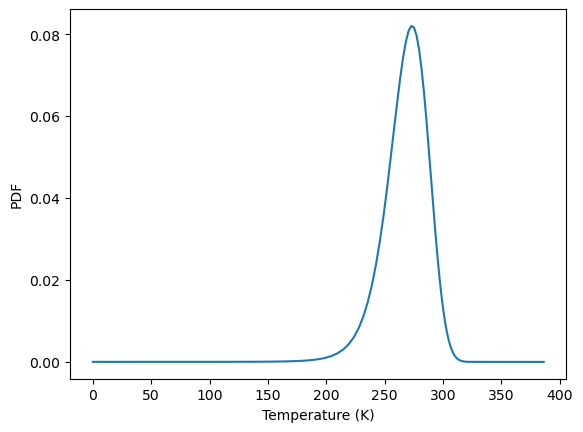

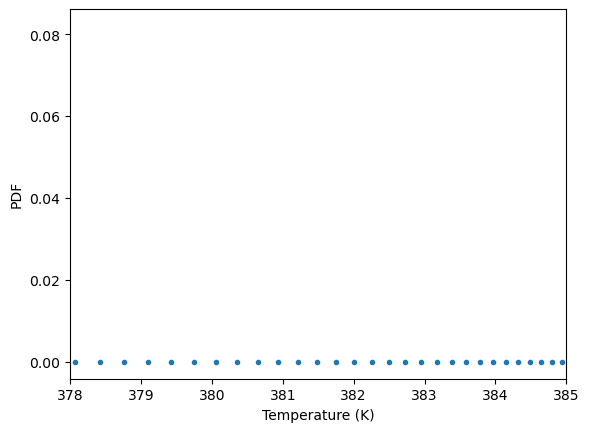

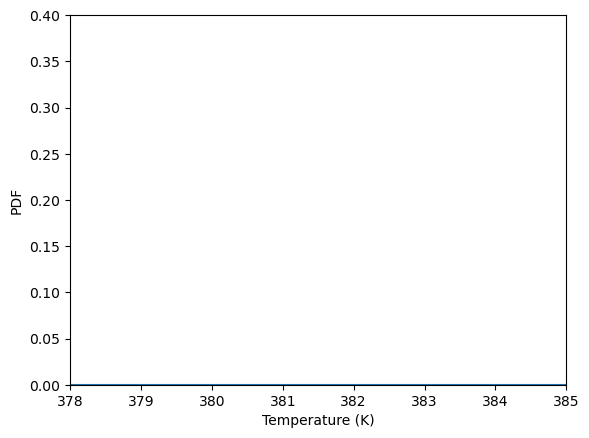

In [24]:
def f_T(T, omega, rho, z):
    tau1 = np.sqrt(1-((rho**2) * (T**8)))
    tau2 = (rho*T**4)/(tau1 * np.tan(z))
    tau3 = tau1**2 * (1+tau2)**2 * (np.sin(z))**2

    #coeff1 = (4*omega*rho*(T**3)) / (np.sqrt(2*np.pi))
    coeff1 = (rho/sigma*epsilon) / (np.sqrt(2*np.pi))
    coeff2 = np.sqrt(1+tau2*(1/np.tan(z)))/tau1
    coeff3 = (1+(1/(omega**2 * tau3)))
    expo =  (1/(2*omega**2)) * (1-(1/tau3)) #(1- (1/(tau1**2 * tau3)))  

    return coeff1*coeff2*coeff3*np.exp(expo)

tod = 7
lat = np.deg2rad(15)

So = 1367 # solar flux, W/m2
A = 0.1 # mare, visual. ~0.3 for Highlands, visual
rEarth = 1.013# AU
sigma = 5.67*10**(-8) #W/m2/K4
epsilon = 0.95

wbi = np.tan(np.deg2rad(5))
w = wbi/np.sqrt(2)

# solar_zenith angle:
#z = np.deg2rad(15) # solar zenith angle
hr_angle = np.deg2rad((tod*15)-180)
z = pr.solar_zenith(lat, 0, hr_angle)
print("z: ", np.rad2deg(z))

#theta = np.deg2rad(90) # slope aspect
#a = -np.sin(hr_angle)/np.sin(z) # solar azimuth angle
#alpha = np.deg2rad(2) # surface slope 
#cosi = np.cos(alpha)*np.cos(z)+np.sin(alpha)*np.sin(z)*np.cos(theta-a)
i_arr = np.deg2rad(np.linspace(1, 90, 180))

# F:
F_arr = (So*(1-A)/((rEarth)**2))*np.cos(i_arr)
B = F_arr/np.cos(i_arr)
#PDF_F = f_F(F_arr, B, z, w)
#F_arr = (So*(1-A)/((rEarth)**2))*cosi
#B = F_arr/cosi


# T:
p = sigma*epsilon/B
T_arr = (F_arr/(sigma*epsilon))**(1/4)
#T_arr = np.linspace(0, 450, 1000)
PDF_T = f_T(T_arr, w, p, z)

plt.plot(T_arr, PDF_T)
plt.ylabel("PDF")
plt.xlabel("Temperature (K)")
plt.show()

plt.plot(T_arr, PDF_T, '.')
plt.ylabel("PDF")
plt.xlabel("Temperature (K)")
plt.xlim((378, 385))
plt.show()

norm_weights = PDF_T/5
plt.plot(T_arr, norm_weights)
plt.ylabel("PDF")
plt.xlabel("Temperature (K)")
plt.xlim((378, 385))
plt.ylim((0, 0.4))
plt.show()

1.439916684181913 1.5684986779417898 0.1289191981980212 232.94612416266384


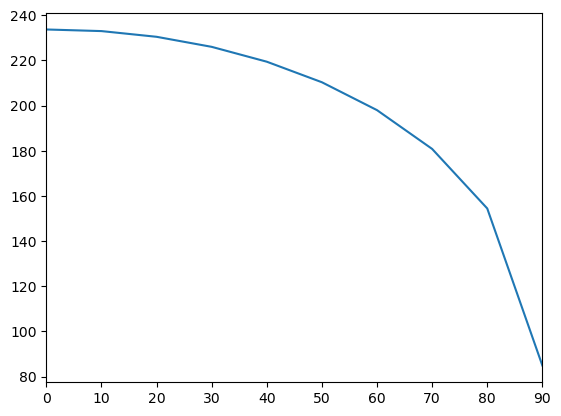

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_59692/3646908047.py:44: RuntimeWarning: invalid value encountered in power
  T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)


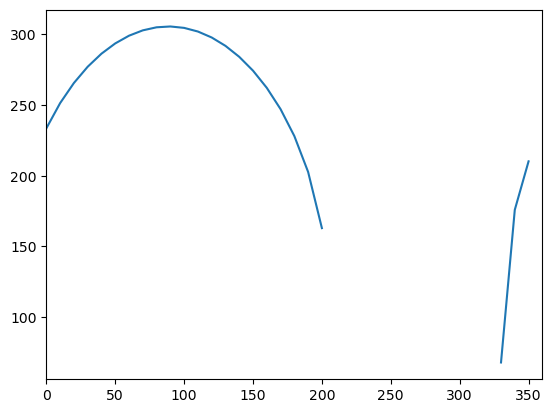

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_59692/3646908047.py:64: RuntimeWarning: invalid value encountered in power
  T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)


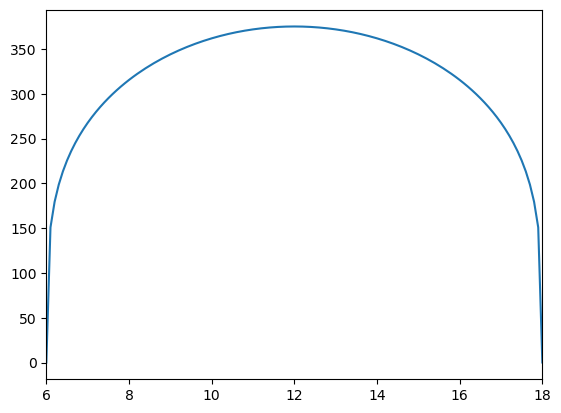

In [90]:
tod = 6.5
lat = np.deg2rad(1)
r = 1

alpha = np.deg2rad(10) # slope angle
theta = np.deg2rad(0) # slope aspect
declination = 0
hour_angle = np.deg2rad((tod*15)-180)
z = np.arccos(np.sin(lat)*np.sin(declination)+np.cos(lat)*np.cos(declination)*np.cos(hour_angle)) # zenith angle, 0 to 90

a = np.arcsin(-np.sin(hour_angle)*np.cos(declination)/np.sin(z)) # solar azimuth, 0 to 360

cosi = np.cos(alpha)*np.cos(z)+np.sin(alpha)*np.sin(z)*np.cos(theta-a)
T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)
print(z, a, cosi, T)

# test for array of slopes
alpha = np.deg2rad(np.arange(0, 100, 10)) # slope angle
theta = np.deg2rad(0) # slope aspect
declination = 0
hour_angle = np.deg2rad((tod*15)-180)
z = np.arccos(np.sin(lat)*np.sin(declination)+np.cos(lat)*np.cos(declination)*np.cos(hour_angle)) # zenith angle, 0 to 90

a = np.arcsin(-np.sin(hour_angle)*np.cos(declination)/np.sin(z)) # solar azimuth, 0 to 360

cosi = np.cos(alpha)*np.cos(z)+np.sin(alpha)*np.sin(z)*np.cos(theta-a)
T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)

plt.plot(np.rad2deg(alpha), T)
plt.xlim((0, 90))
plt.show()

# test for array of aspects - this should be minimal for low lats, noticable for high lats
lat = np.deg2rad(10)
alpha = np.deg2rad(15) # slope angle
theta = np.deg2rad(np.arange(0, 360, 10)) # slope aspect
declination = 0
hour_angle = np.deg2rad((tod*15)-180)
z = np.arccos(np.sin(lat)*np.sin(declination)+np.cos(lat)*np.cos(declination)*np.cos(hour_angle)) # zenith angle, 0 to 90

a = np.arcsin(-np.sin(hour_angle)*np.cos(declination)/np.sin(z)) # solar azimuth, 0 to 360

cosi = np.cos(alpha)*np.cos(z)+np.sin(alpha)*np.sin(z)*np.cos(theta-a)
T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)

plt.plot(np.rad2deg(theta), T)
plt.xlim((0, 360))
plt.show()

# this fails at lats > 80 slopes = 10

# test for array of tod - compare to real moon temps?
tod = np.arange(0, 24, 0.1)
lat = np.deg2rad(45)
alpha = np.deg2rad(15) # slope angle
theta = np.deg2rad(0) # slope aspect
declination = 0
hour_angle = np.deg2rad((tod*15)-180)
z = np.arccos(np.sin(lat)*np.sin(declination)+np.cos(lat)*np.cos(declination)*np.cos(hour_angle)) # zenith angle, 0 to 90

a = np.arcsin(-np.sin(hour_angle)*np.cos(declination)/np.sin(z)) # solar azimuth, 0 to 360

cosi = np.cos(alpha)*np.cos(z)+np.sin(alpha)*np.sin(z)*np.cos(theta-a)
T = (So * ((1-A)/(r**2 * sigma*epsilon)*cosi))**(1/4)

plt.plot(tod, T)
plt.xlim((6, 18))
plt.show()




/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_59692/1495282927.py:1: RuntimeWarning: invalid value encountered in power
  new_T = ((So*((1-A)/(r**2))*cosi + 12*10**(-3))/(sigma*epsilon))**(1/4)


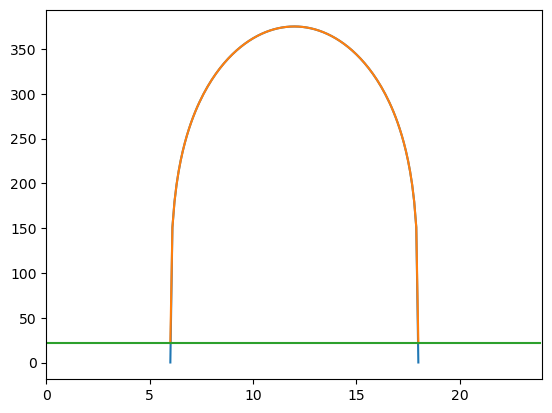

In [91]:
new_T = ((So*((1-A)/(r**2))*cosi + 12*10**(-3))/(sigma*epsilon))**(1/4)
new_T_night = np.ones(240)*((12*10**(-3))/(sigma*epsilon))**(1/4)
plt.plot(tod, T)
plt.plot(tod, new_T)
plt.plot(tod, new_T_night)
plt.xlim((0, 24))
plt.show()

/var/folders/8b/58p6cy2n6_5dxsjpc6f4kp580000gn/T/ipykernel_30643/2970864529.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(np.int(h/2), np.int(w/2), c='k')


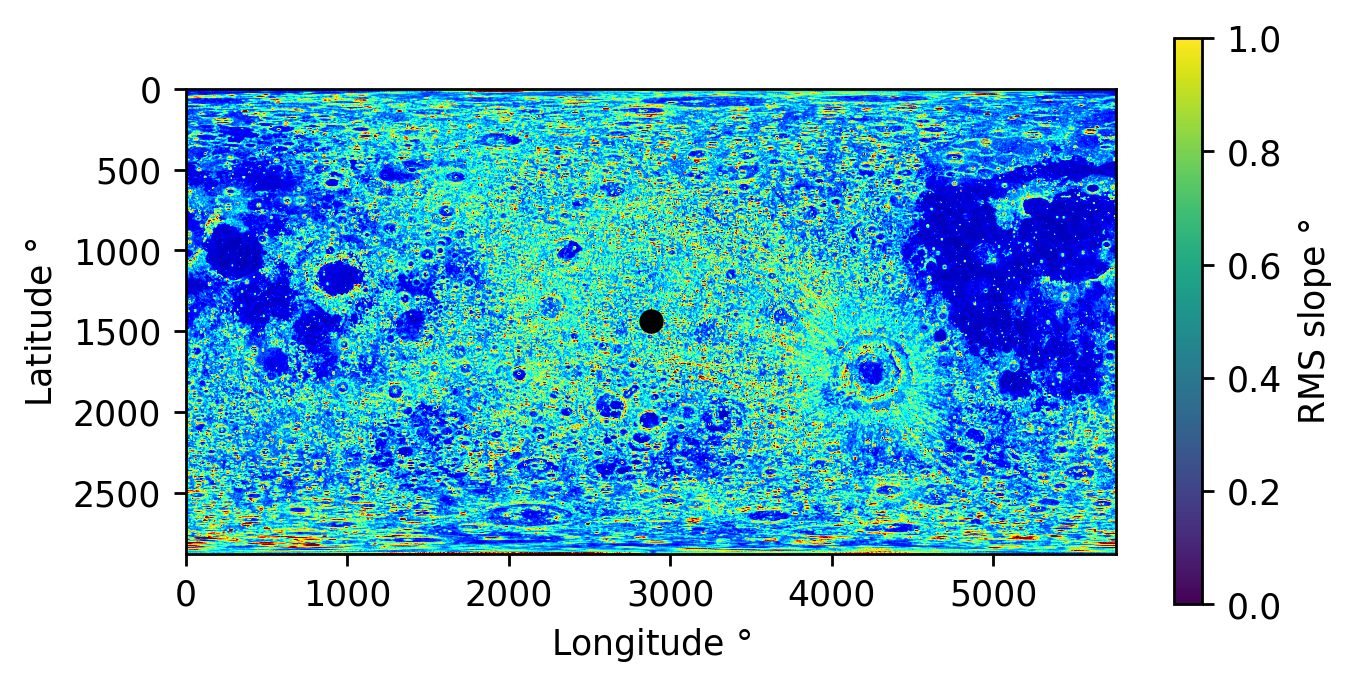

In [54]:
plt.figure(figsize=(6, 3), dpi=250)
plt.imshow(img*0.0015 + 45, vmin=0, vmax=15, cmap='jet')#, vmin=0, vmax=25, cmap='jet')
plt.scatter(np.int(h/2), np.int(w/2), c='k')
#plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125-90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
#plt.xticks(ticks=[0, h/2, h], labels=[0, 180, 360])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()



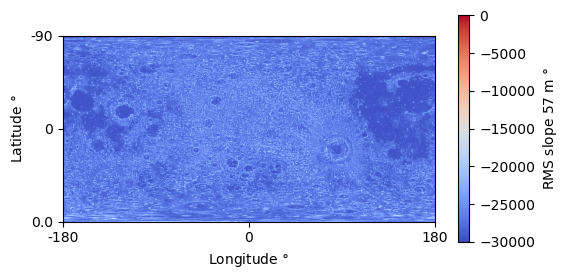

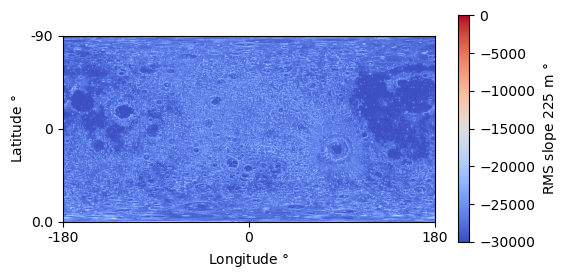

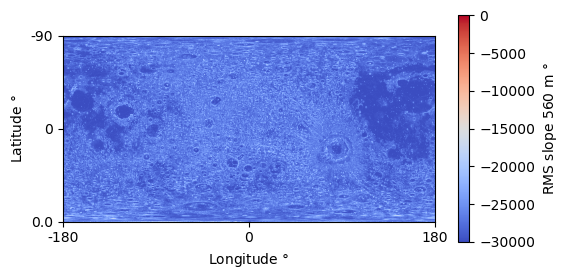

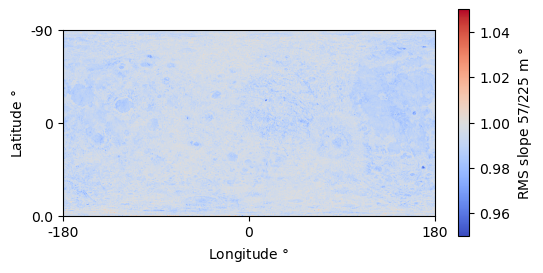

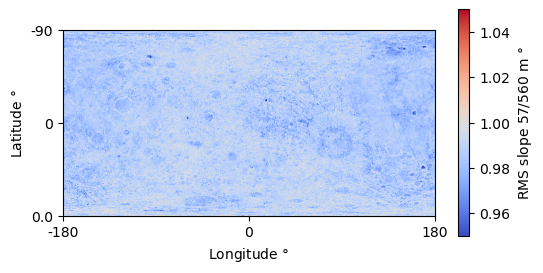

In [97]:
loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/Data/'
filename = 'MAS_57M_16.img'

# set width and height 
w, h = 2880, 5760 

with open(loc+filename, 'rb') as f: 
    #img = np.fromfile(f, dtype=np.uint16).reshape(w, h)
    a = np.fromfile(f, dtype=np.int16).reshape(w, h)

plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(a, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
plt.ylabel('Latitude $\degree$')
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope 57 m $\degree$')
plt.show()

filename = 'MAS_225M_16.img'

# set width and height 
w, h = 2880, 5760 

with open(loc+filename, 'rb') as f: 
    #img = np.fromfile(f, dtype=np.uint16).reshape(w, h)
    b = np.fromfile(f, dtype=np.int16).reshape(w, h)

plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(b, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
plt.ylabel('Latitude $\degree$')
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope 225 m $\degree$')
plt.show()

filename = 'MAS_560M_16.img'

# set width and height 
w, h = 2880, 5760 

with open(loc+filename, 'rb') as f: 
    #img = np.fromfile(f, dtype=np.uint16).reshape(w, h)
    c = np.fromfile(f, dtype=np.int16).reshape(w, h)

plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(c, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
plt.ylabel('Latitude $\degree$')
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope 560 m $\degree$')
plt.show()

plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(np.abs(a)/np.abs(b), vmin=0.95, vmax=1.05, cmap='coolwarm')#, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
plt.ylabel('Latitude $\degree$')
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope 57/225 m $\degree$')
plt.show()

plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(np.abs(a)/np.abs(c), vmin=0.95, vmax=1.05, cmap='coolwarm')#, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
plt.ylabel('Latitude $\degree$')
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope 57/560 m $\degree$')
plt.show()

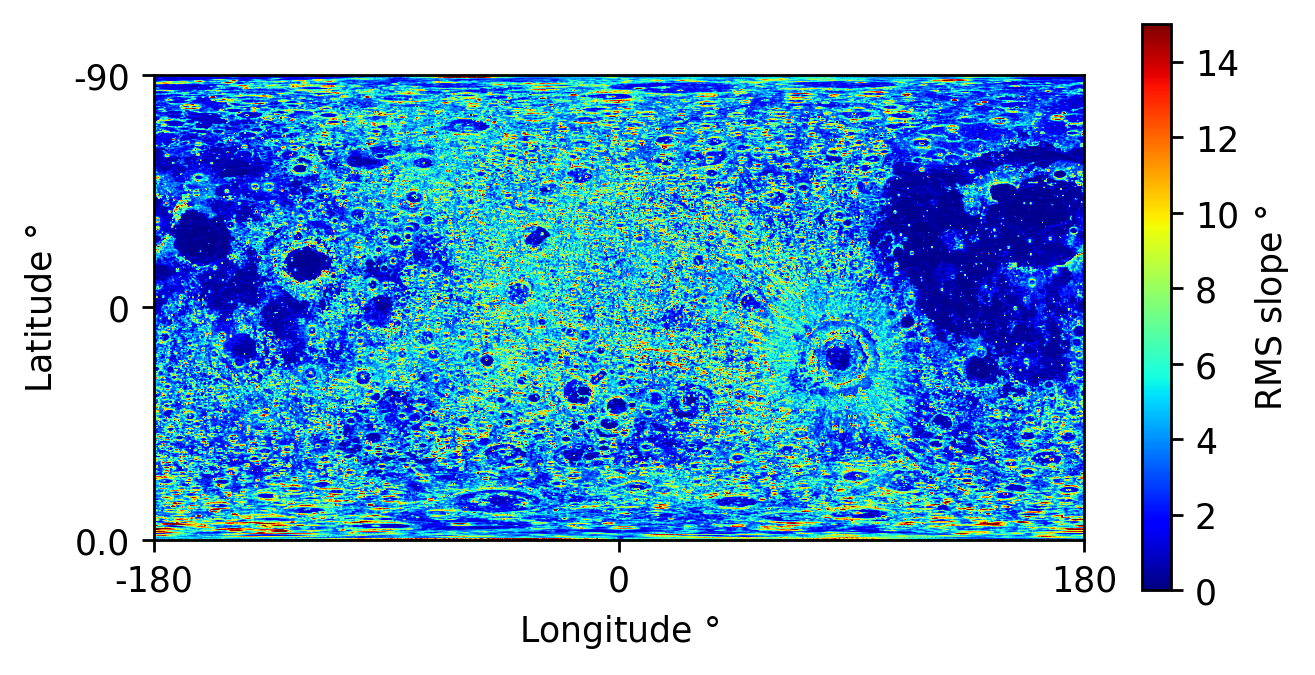

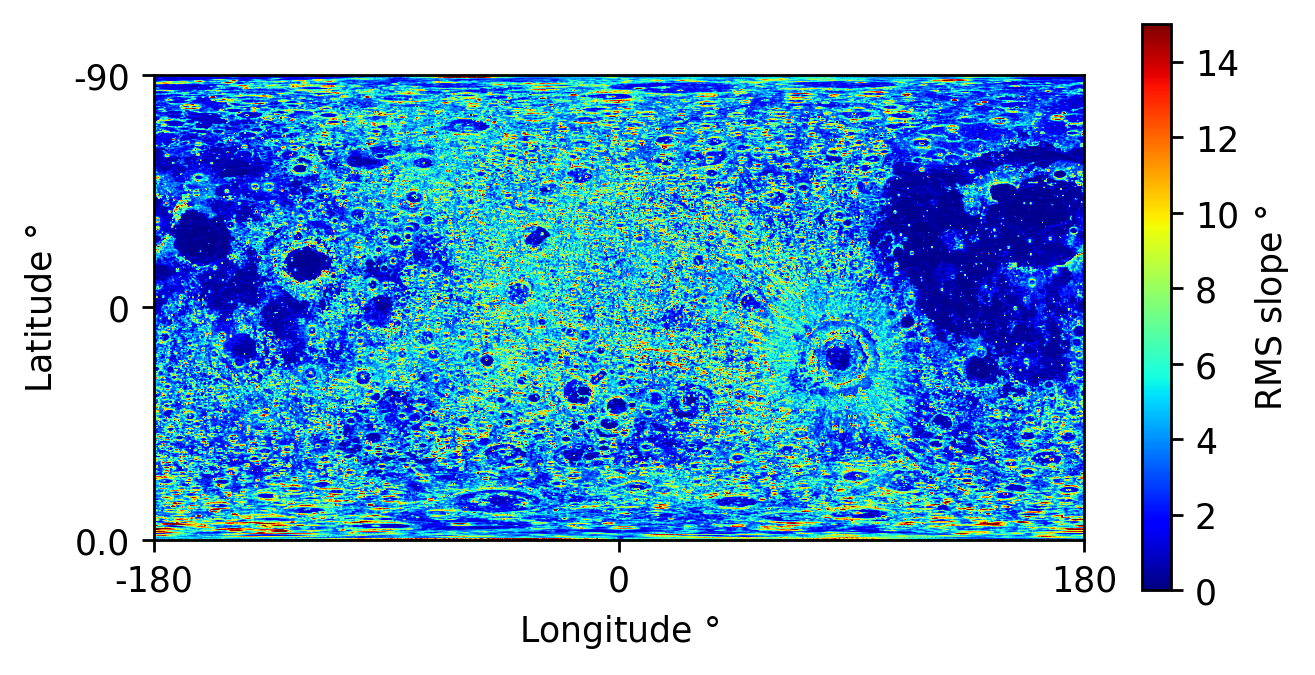

In [119]:
plt.figure(figsize=(6, 3), dpi=250)
plt.imshow(c*0.0015 + 45, vmin=0, vmax=15, cmap='jet')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()

plt.figure(figsize=(6, 3), dpi=250)
plt.imshow(img*0.0015 + 45, vmin=0, vmax=15, cmap='jet')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 - 90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()

In [78]:
# set width and height 
w, h = 2880, 5760 #
#w, h = 5760, 11520


loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/Data/'
filename='ldsm_16.img'

with open(loc+filename, 'rb') as f: 
    #img = np.fromfile(f, dtype=np.uint16).reshape(w, h)
    img = np.fromfile(f, dtype=np.int16).reshape(w, h)




at 240 m baseline
flat == -30000
45 degrees == 0
-30000


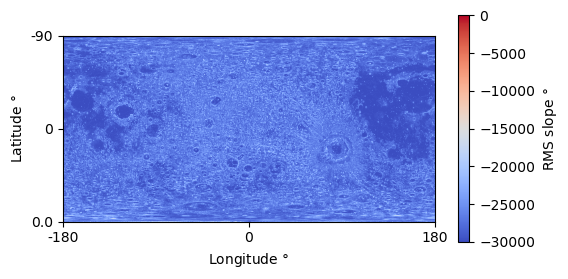

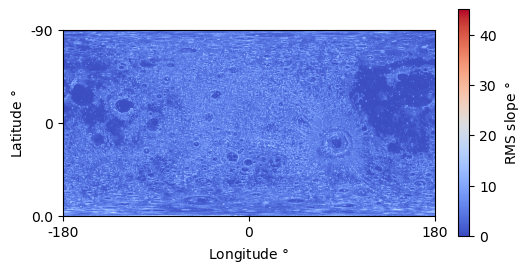

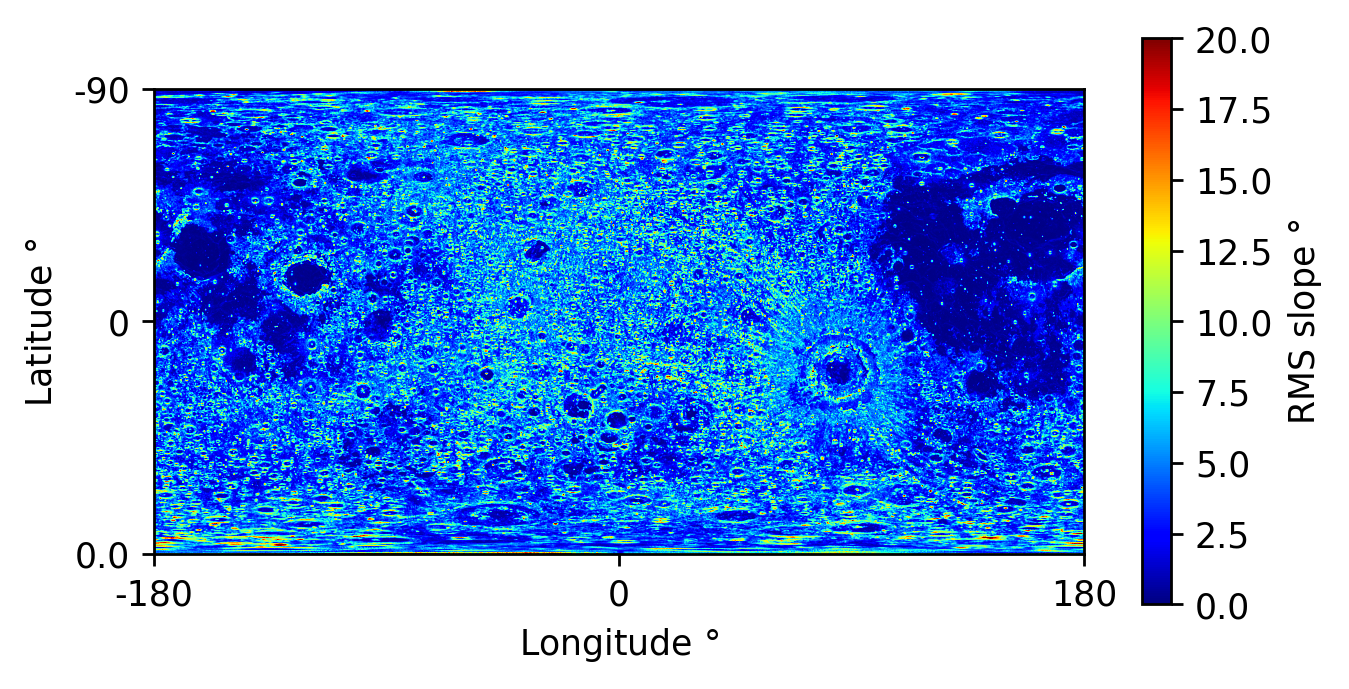

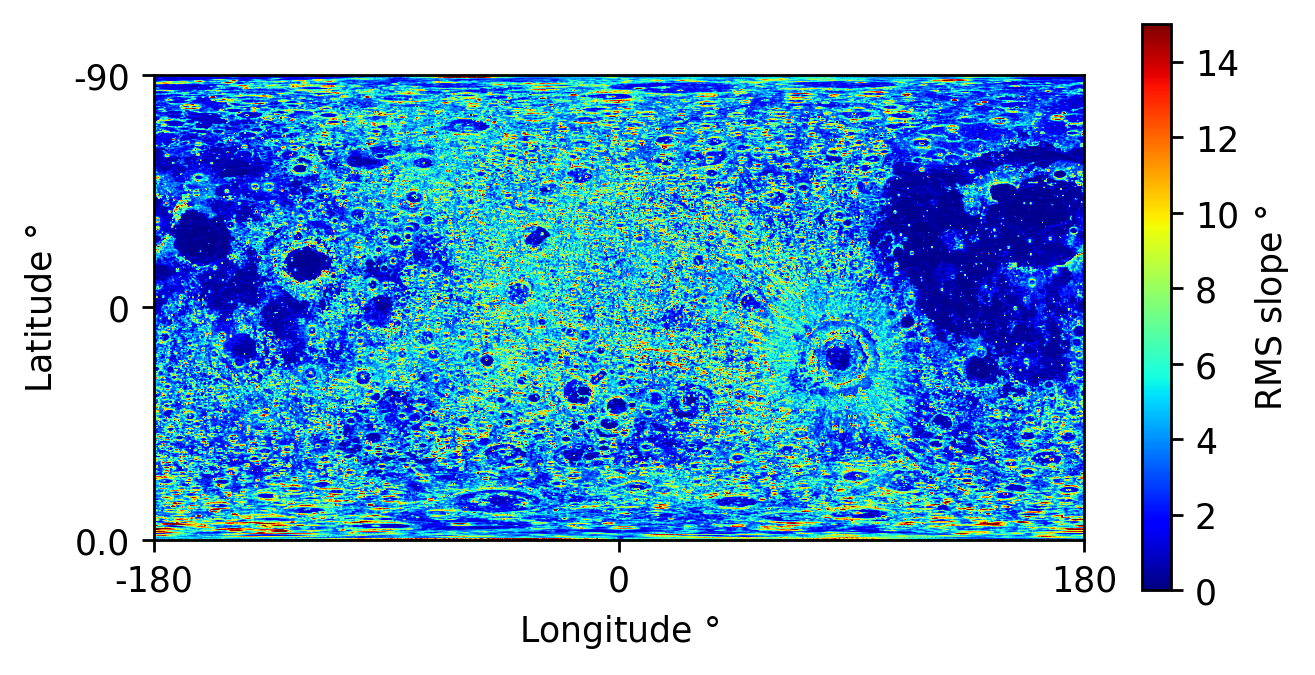

In [115]:
print('at 240 m baseline')
print('flat == -30000')
print('45 degrees == 0')
print(np.nanmin(img))

# each line is 0.03125 degrees latitude
plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(img, vmin=-30000, vmax=0, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()


plt.figure(figsize=(6, 3), dpi=100)
plt.imshow(img*0.0015 + 45, vmin=0, vmax=45, cmap='coolwarm')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()

plt.figure(figsize=(6, 3), dpi=250)
plt.imshow(img*0.0015 + 45, vmin=0, vmax=20, cmap='jet')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()

plt.figure(figsize=(6, 3), dpi=250)
plt.imshow(img*0.0015 + 45, vmin=0, vmax=15, cmap='jet')#, vmin=0, vmax=25, cmap='jet')
plt.yticks(ticks=[0, w/2, w], labels=[-90, 0, w*0.03125 -90])
#plt.xlim((0, w*0.03125))
plt.ylabel('Latitude $\degree$')
#plt.ylim((-180, 180))
plt.xticks(ticks=[0, h/2, h], labels=[-180, 0, 180])
plt.xlabel('Longitude $\degree$')
plt.colorbar(label='RMS slope $\degree$')
plt.show()

In [2]:
# constants
sigma = 5.67*10**(-8) #W/m2/K4
A = 0.1 # mare, visual. ~0.3 for Highlands, visual
R = 1.0 # distance from sun, AU (simplified)
So = 1367 # solar flux, W/m2
epsilon = 0.95

In [3]:
# Functions
def beta(S0, A, r):
    # S0: solar constant at 1 AU
    # A: Surface albedo
    # r: distance from the sun in AU
    return S0*(1-A)/(r)**2

def rho(sigma, epsilon, beta):
    return sigma*epsilon/beta

def f_cosi_theta(omega, i, z):
    c_p = np.cos(i + z)
    c_n = np.cos(i - z)
    coeff1 = omega/(np.sqrt(np.pi*((1-(c_p/c_n)))))
    coeff2 = 1+ (1/(omega**2 * c_n**2))
    expo = (1/(2*omega**2))*(1-(1/(c_n**2)))
    return coeff1*coeff2*np.exp(expo)

def f_F(F, beta, z, omega):
    phi1 = np.sqrt(1-((F**2)/(beta**2)))
    phi2 = ((F/beta)*(1/np.tan(z))) / phi1
    phi3 = phi1**2 * (1+phi2)**2 * (np.sin(z))**2

    coeff1 = omega /(np.sqrt(2*np.pi*beta**2))
    coeff2 = np.sqrt(1+phi2*(1/np.tan(z)))/phi1
    coeff3 = (1+(1/(omega**2 * phi3)))
    expo = (1/(2*omega**2) *(1 - (1/phi3)))
    return coeff1*coeff2*coeff3*np.exp(expo)

def f_T(T, omega, rho, z):
    tau1 = np.sqrt(1-((rho**2) * (T**8)))
    tau2 = (rho*T**4)/(tau1 * np.tan(z))
    tau3 = tau1**2 * (1+tau2)**2 * (np.sin(z))**2

    coeff1 = (4*omega*rho*(T**3)) / (np.sqrt(2*np.pi))
    coeff2 = np.sqrt(1+tau2*(1/np.tan(z)))/tau1
    coeff3 = (1+(1/(omega**2 * tau3)))
    expo =  (1/(2*omega**2)) * (1-(1/tau3)) #(1- (1/(tau1**2 * tau3)))  

    return coeff1*coeff2*coeff3*np.exp(expo)


def LOLA(lat, long, data):
    # for now, this is a test
    wbi = np.tan(np.deg2rad(5))
    return wbi/np.sqrt(2)
    # read in LOLA bidirectional surface roughness from map
    

def roughT(lat, long,  tod, data, LOLAdata):
    temp_flat, n = DivinerT(lat, long, tod, data) 
    wbi_LOLA = LOLA(lat, long, LOLAdata)
    w = np.tan(np.deg2rad(wbi_LOLA))/np.sqrt(2)
    
    theta = np.deg2rad(0) # slope aspect
    z = np.deg2rad(15) # solar zenith angle
    a = np.deg2rad(0) # the orientation of the sun 
    i_arr = np.deg2rad(np.linspace(1, 90, 90))

    # expected cosi       
    fcosi_n = f_cosi_theta(w, i_arr, z)/np.max(f_cosi_theta(w, i_arr, z))

    # F:
    F_arr = (So*(1-A)/((R)**2))*np.cos(i_arr)
    B = F_arr/np.cos(i_arr)
    PDF_F = f_F(F_arr, B, z, w)

    # T:
    p = sigma*epsilon/B
    T_arr = (F_arr/(sigma*epsilon))**(1/4)
    PDF_T = f_T(T_arr, w, p, z)
    
    T = random.choices(T_arr, weights=PDF_T)
    return T

In [4]:
def Model_MonteCarlo_Rough(particle, dt, t, local_noon):
    R_bar = R/(m_H2O/1000)
    pMass = mass
    sigma_Sputtering = sput_lifespan_G19
    photo_lifespan =  photo_lifespan_S14

    # results array
    results = np.zeros((8, int(t/dt)+1))*np.nan # (lat, long, tod, temp, exists, total time, hops, dist), 2rd is time
    
    # if exists = True, set 1. Else, set 0
    
    i = 0
    results[0:3, 0] = particle
    results[4, 0] = False
    conda = False
    condb = False
    condc = False
    
    lunar_dt = sec_per_hour_M*dt

    # let particle run for 1 lunar rotation
    for i in range(0, int(t/dt), 1):
        st_time = time.time()
        print('Lunar time: %2.1f'%i)

        
        results[3, i] = roughT(results[0, i], results[1, i], results[2, i], data, loladata)
        print('Surface temperature: %2.0f K '%results[3, i])
        
        # define how long it sits for
        tau_surf = surftime(R_bar, results[3, i], pMass)  

        # if it sits for a timestep, test lost, then move to next timestep
        if tau_surf >= lunar_dt:
            #print('Particle sits longer than a lunar time step')
            #print('Latitude: %2.0f, Longitude: %2.0f' %(np.rad2deg(results[0, i]), np.rad2deg(results[1, i])))
            conda = loss(sigma_Sputtering, photo_lifespan, lunar_dt, results[2, i])
            if conda == True:
                #print('Particle is lost from sitting')
                results[4, i] = conda
                break
            else:
                #print('Particle is not lost from sitting')
                results[0:3, i+1] = results[0:3, i]
                results[4, i+1] = conda
                results[5, i] = 0
                results[6, i] = 0
                results[7, i] = 0

        else: 
            #print('Particle begins jump')
            tof_tot = 0
            tot_time = 0
            tot_dist = 0
            #conda == False
            hops = 0
            while tot_time < lunar_dt:
                #print(tot_time, lunar_dt)
                # while the time of jumping is less than a timestep
                conda = loss(sigma_Sputtering, photo_lifespan, tau_surf, results[2, i])
                if conda == True:
                    #print('Particle is lost during sitting, following a jump')
                    # if lost to loss mechanism, exit loop. 
                    results[4, i+1] = conda
                    break
                else:
                    # let it bounce
                    direction, launch = random_vals() 
                    results[0:3, i+1], f_tof, distm, condc = ballistic(results[3, i], results[0, i], results[1, i], results[2, i], direction, launch, pMass, vel_dist)
                    #print(results[0:3, i+1], f_tof, distm, condc)
                    if condc == True:
                        #print('Particle is lost to jeans loss')
                        results[4, i+1] = condc
                        break
                    else:
                        condb = loss(sigma_Sputtering, photo_lifespan, f_tof, results[2, i])

                        hops += 1
                        tof_tot += f_tof
                        tot_dist += distm

                        # is it detroyed in the jump?
                        if condb == True:
                            #print('Particle is lost in jump')
                            results[4, i+1] = condb
                            break
                        else:
                            results[4, i+1] = condb
                            results[3, i] = roughT(results[0, i], results[1, i], results[2, i], data, loladata)
                            tau_surf = surftime(R_bar, results[3, i+1], pMass)

                            # advance total time. 
                            tot_time += (f_tof + tau_surf)
                            
            results[5, i] = tof_tot
            results[6, i] = hops
            results[7, i] = tot_dist                
            #print('Particle ends jump after %3.2e'%tot_time)
            #print('Particle is at: (%2.1f, %2.1f), %2.1f hr'%(np.rad2deg(results[0, i]), np.rad2deg(results[1, i]), results[2, i]))
        en = time.time()
        #print('Time of step %3.0f is: %3.2f'%(i, en-st_time))
        if conda == True or condb == True or condc == True:
            #print('Particle is lost from the simulation')
            conda = False
            condb = False
            condc = False
            break
        else:
            #print('Moon rotates')
            local_noon += (360/(t/dt)) # degrees
            #print('Local noon: %2.1f'%local_noon)
            results[2, i+1] = (12 + (np.rad2deg(results[1, i+1])+local_noon)*(24/360))%24 
            #print('New time of day: %2.1f'%results[2, i+1])
    return results[:, :-1]


In [2]:
# Establish run parameters
# Initial longitude of noon
local_noon = 0

# Run time in lunar hours
t = 24

# Size of time step in lunar hours
dt = 0.25 

# Number of particles
n = 1000

In [6]:
# establish particles
particles = np.zeros((n, 3)) # latitude, longitude,  tod
particles[:, 0] = np.deg2rad(random.choices(range(-90, 90), k=n)) # latitude in degrees
particles[:, 1] = np.deg2rad(random.choices(range(0, 360), k=n)) # longitude in degrees
particles[:, 2] = (12+(((np.rad2deg(particles[:, 1]-local_noon))*24)/360))%24 # tod, based on where local noon is


In [7]:
# run
results = np.zeros((n, 8, int(t/dt)))

# start timer
st = time.time()

# Run model for n particles, 1 lunar day time step 1/2 hr (lunar)
for i in range(0, n, 1):
    results[i, :, :] = pr.Model_MonteCarlo_Rough(particles[i, :], dt, t, local_noon)
    if i % 10 ==0:
            print('particle', i)

print('Total simulation time: %2.1f'%(time.time() - st))

print('Lunar time step: %3.2e'%(pr.sec_per_hour_M*dt))

/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:453: RuntimeWarning: overflow encountered in double_scalars
  tau_sub = (theta_mon * pMass*Avo) / sub
/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:322: RuntimeWarning: divide by zero encountered in double_scalars
  tau = 1/R_des # this is simplified, to assume mean residence time
/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:453: RuntimeWarning: divide by zero encountered in double_scalars
  tau_sub = (theta_mon * pMass*Avo) / sub


particle 0
lacking tod data, expanding search


/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:199: RuntimeWarning: invalid value encountered in sqrt
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax
/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:199: RuntimeWarning: invalid value encountered in arcsin
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax


particle 10
lacking tod data, expanding search
particle 20
particle 30
particle 40
lacking tod data, expanding search
particle 50
lacking tod data, expanding search
particle 60
particle 70
particle 80
particle 90
particle 100
particle 110
particle 120
particle 130
particle 140
particle 150
particle 160
lacking tod data, expanding search
particle 170
lacking tod data, expanding search
particle 180
lacking tod data, expanding search
particle 190
particle 200
particle 210
particle 220
particle 230
lacking tod data, expanding search
particle 240
particle 250
particle 260
lacking tod data, expanding search
particle 270
lacking tod data, expanding search
particle 280
particle 290
particle 300
particle 310
particle 320
lacking tod data, expanding search
lacking tod data, expanding search
7.944740911387929 -139.78238169762355 14.688035491603554
lacking tod data, expanding search
lacking tod data, expanding search
particle 330
particle 340
lacking tod data, expanding search
particle 350
particl

In [ ]:
print(results[:, 2, 49])

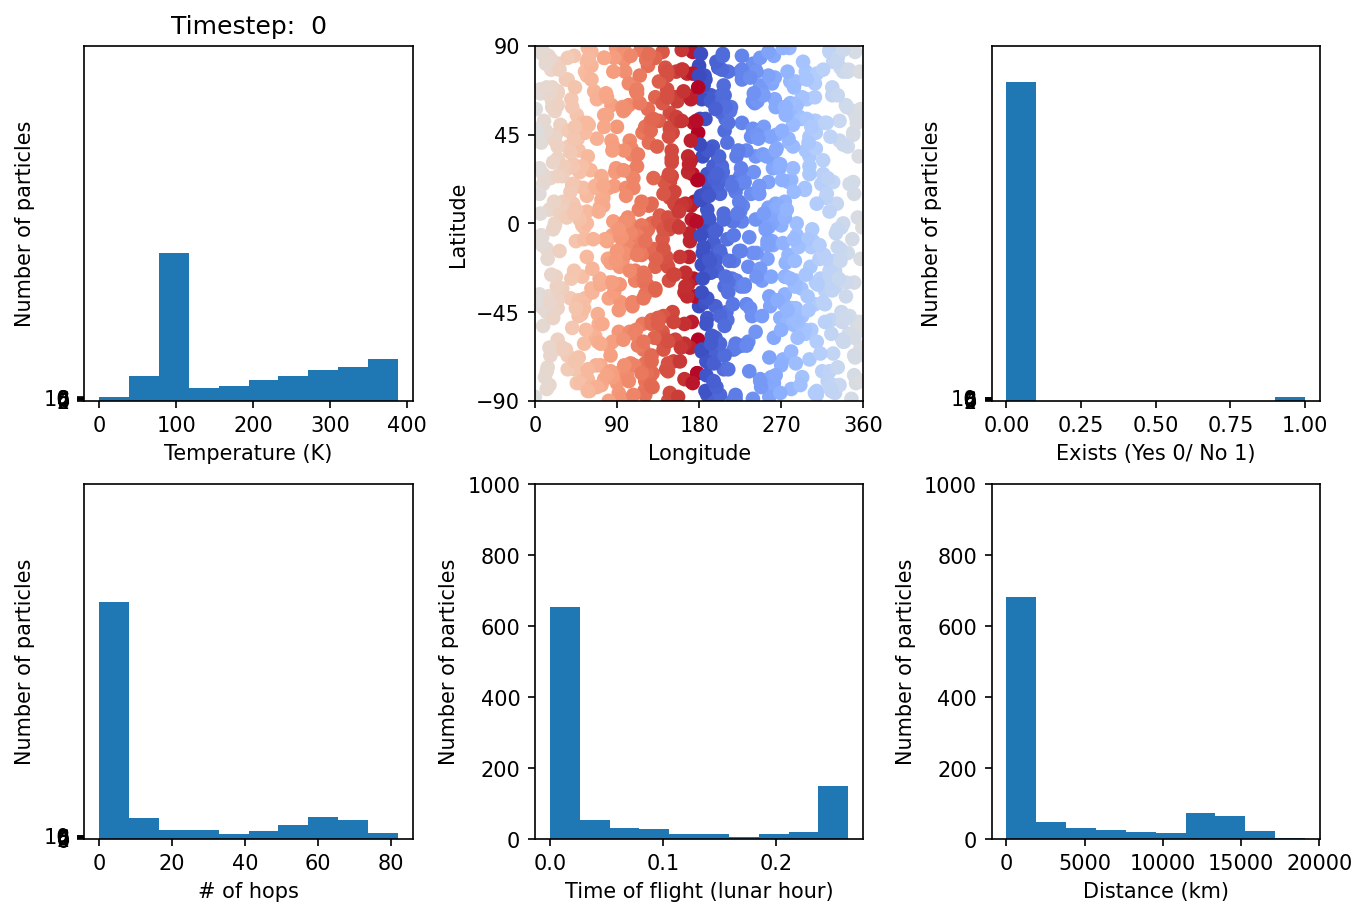

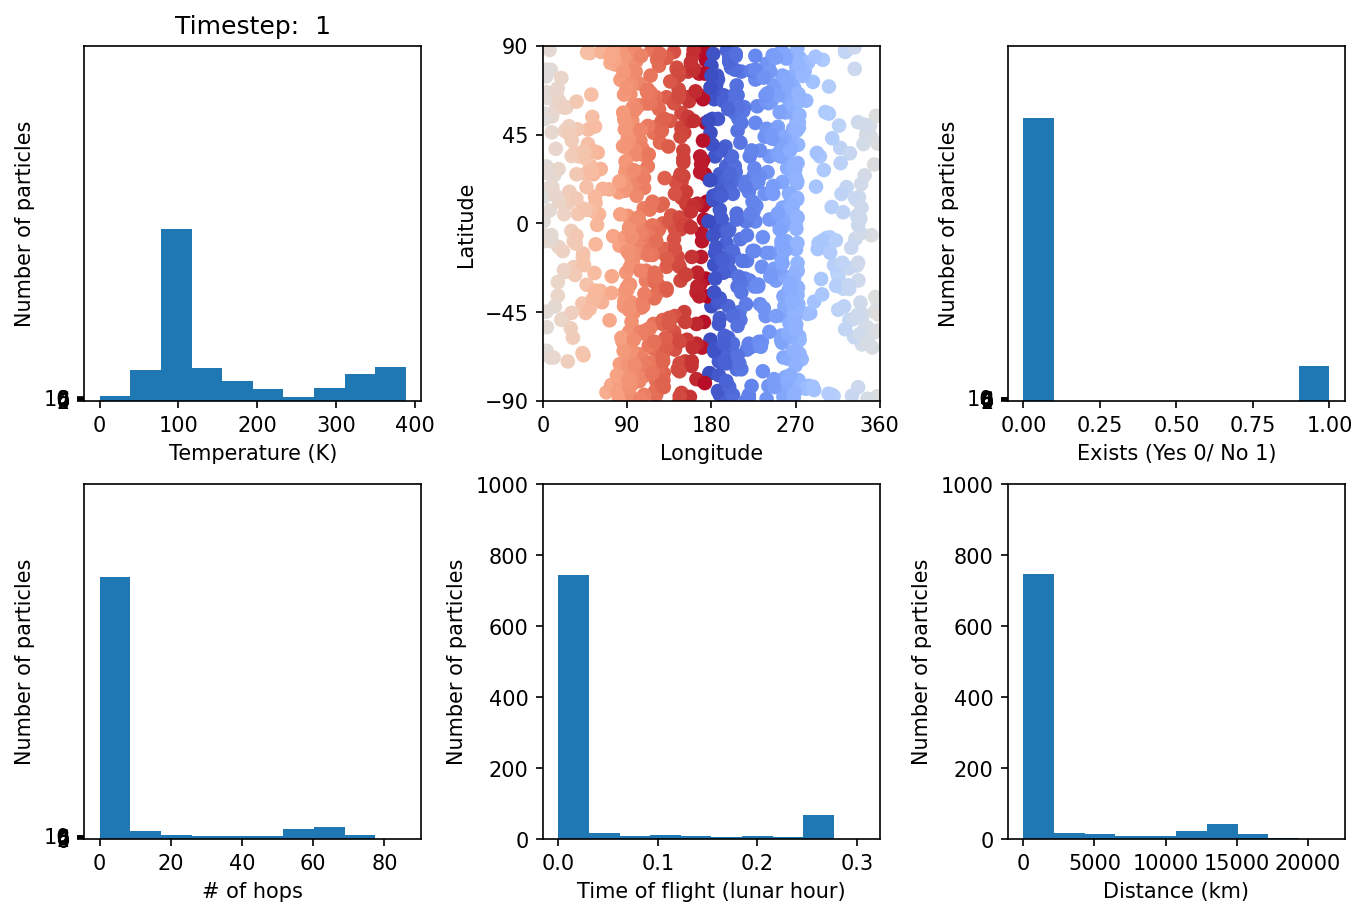

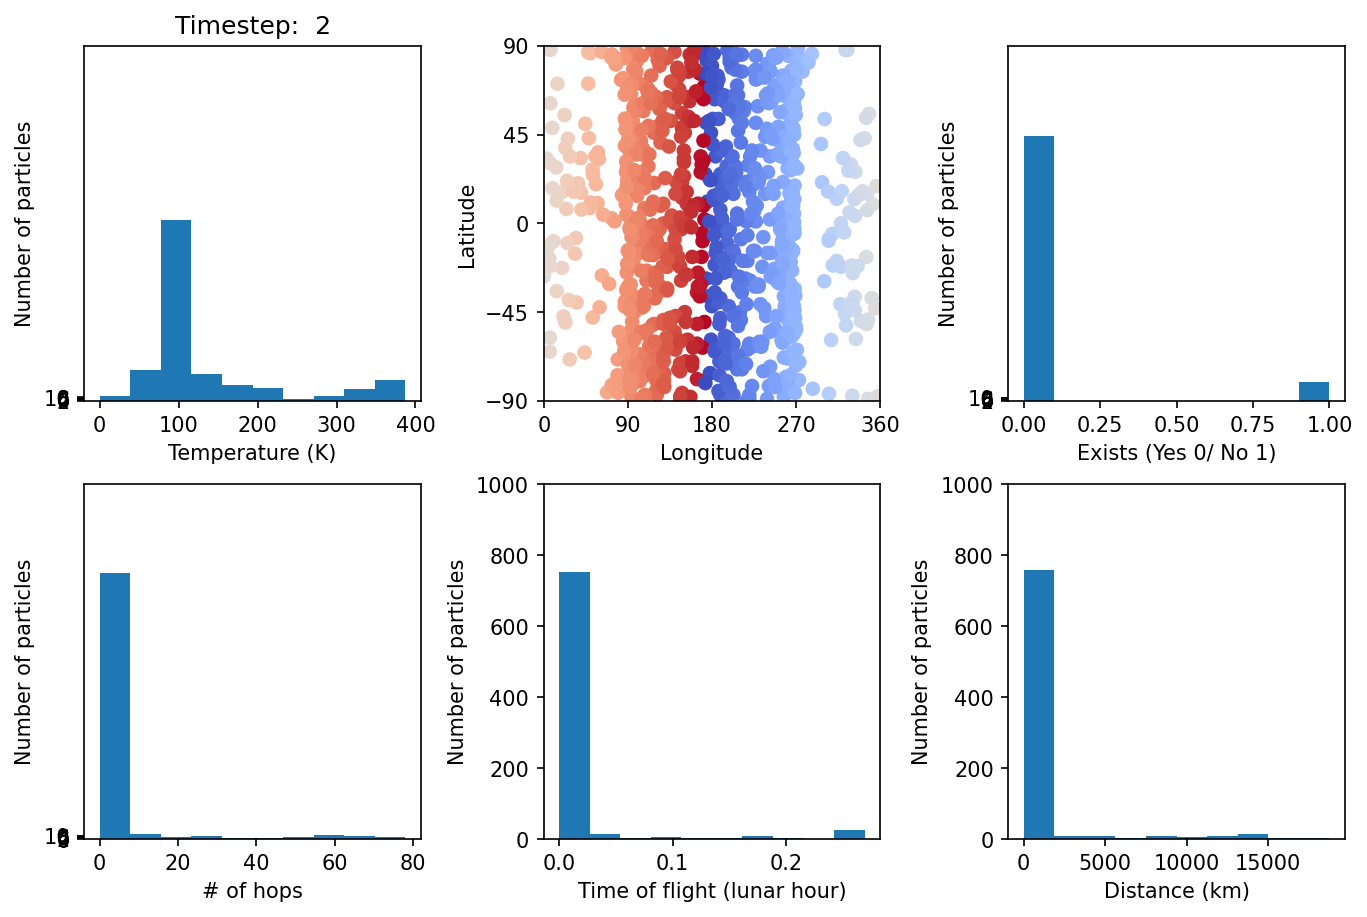

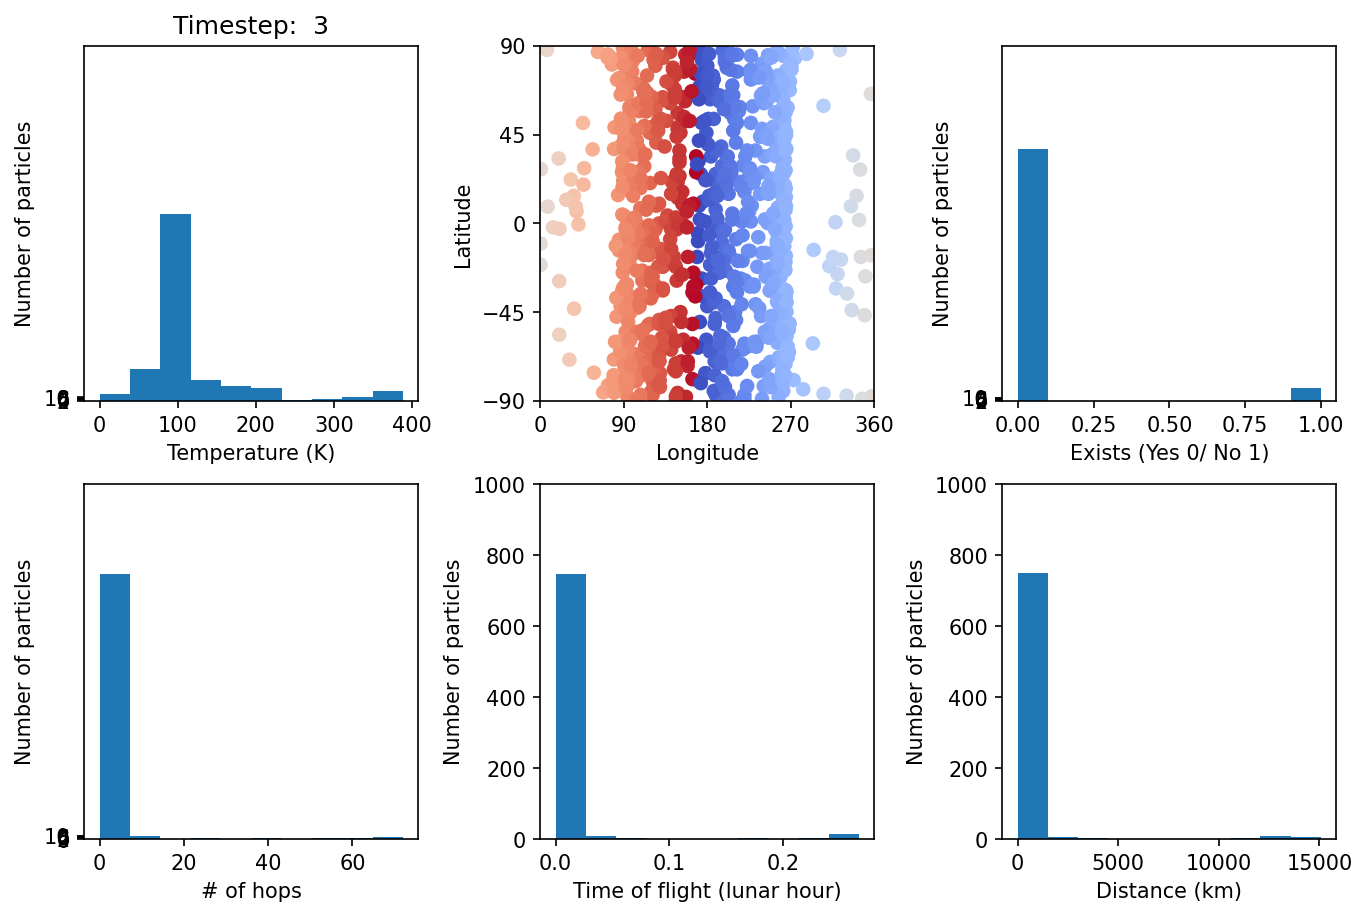

In [8]:
# particle, [lat, long, tod, temp, cond, total time, hops, dist], lunar timestep
# results[:, :, :]

for i in range(0, 4, 1):
    fig = plt.figure(figsize=(9, 6), dpi=150, constrained_layout=True)
    #plt.title('Timestep: %2.0f'%i)

    axs = fig.subplot_mosaic(
    [
        ["hist", "image", "exists"], 
        ["hops", "time", "dist"]
    ])
    
    axs["hist"].hist(results[:, 3, i])
    axs["hist"].set_ylabel('Number of particles')
    axs["hist"].set_xlabel('Temperature (K)')
    axs["hist"].set_ylim((0, 1000))
    axs["hist"].set_yticks([0, 2, 4, 6, 8, 10])
    axs["hist"].set_title('Timestep: %2.0f'%i)

    axs["image"].scatter(np.rad2deg(results[:, 1, i]), np.rad2deg(results[:, 0, i]), c=results[:, 2, i], cmap='coolwarm', vmin=0, vmax= 24)
    axs["image"].set_ylabel('Latitude')
    axs["image"].set_xlabel('Longitude')
    axs["image"].set_ylim((-90, 90))
    axs["image"].set_xlim((0, 360))
    axs["image"].set_yticks([-90, -45, 0, 45, 90])
    axs["image"].set_xticks([0, 90, 180, 270, 360])

    axs["exists"].hist(results[:, 4, i])
    axs["exists"].set_ylabel('Number of particles')
    axs["exists"].set_xlabel('Exists (Yes 0/ No 1)')
    axs["exists"].set_ylim((0, 1100))
    axs["exists"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["hops"].hist(results[:, 6, i])
    axs["hops"].set_ylabel('Number of particles')
    axs["hops"].set_xlabel('# of hops')
    axs["hops"].set_ylim((0, 1000))
    axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["time"].hist(results[:, 5, i]/pr.sec_per_hour_M)
    axs["time"].set_ylabel('Number of particles')
    axs["time"].set_xlabel('Time of flight (lunar hour)')
    axs["time"].set_ylim((0, 1000))
    #axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    axs["dist"].hist(results[:, 7, i]/1000)
    axs["dist"].set_ylabel('Number of particles')
    axs["dist"].set_xlabel('Distance (km)')
    axs["dist"].set_ylim((0, 1000))
    #axs["hops"].set_yticks([0, 2, 4, 6, 8, 10])
    
    
    
    #axs["image"].colorbar()
    
    
    
    
    

In [31]:
print(np.shape(pr.data))
surfT = pr.data[:, :, 10]
masksurfT = surfT == -9999
surfT[masksurfT] = np.nan
print(np.argwhere(surfT==np.nanmin(surfT)))
print(pr.data[17, 260154, 0:3])

(18, 1382400, 11)
[[    17 260154]]
[-112.25   84.75   22.62]


19.3925 438.9996 179.1417083548378


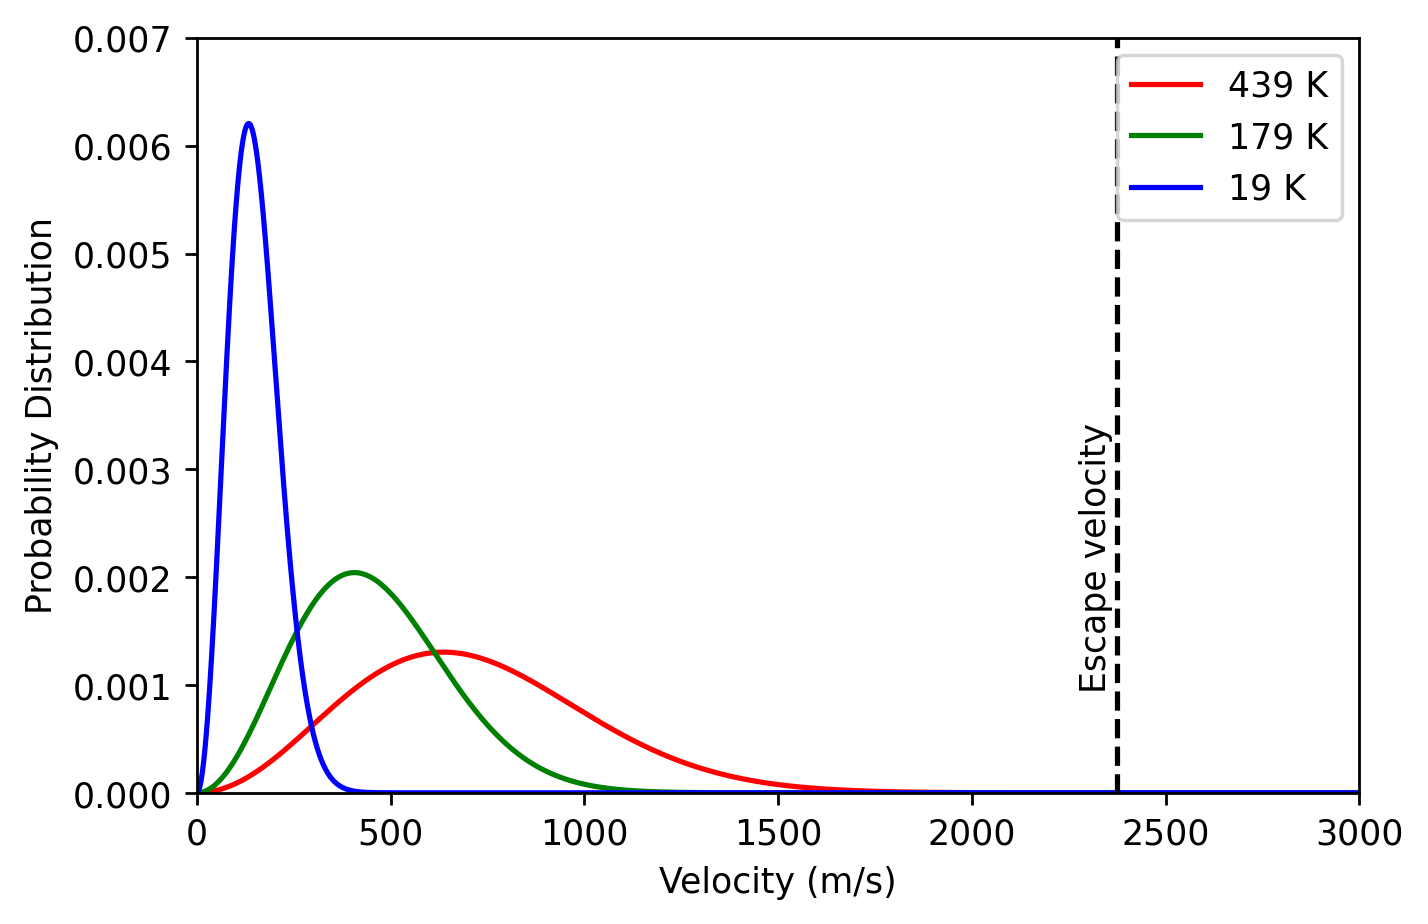

In [36]:
max_T = np.nanmax(surfT)
min_T = np.nanmin(surfT)
mean_T =np.nanmean(surfT)
print(min_T, max_T, mean_T)

v_max = pr.maxwell_boltz_dist(pr.vel_dist, (pr.m_H2O/1000)/pr.Avo, max_T)
v_mean = pr.maxwell_boltz_dist(pr.vel_dist, (pr.m_H2O/1000)/pr.Avo, mean_T)
v_min = pr.maxwell_boltz_dist(pr.vel_dist, (pr.m_H2O/1000)/pr.Avo, min_T)

plt.figure(figsize=(6, 4), dpi=250)
plt.plot(pr.vel_dist, v_max, label='%2.0f K'%max_T, c='red')
plt.plot(pr.vel_dist, v_mean, label='%2.0f K'%mean_T, c='green')
plt.plot(pr.vel_dist, v_min, label='%2.0f K'%min_T, c='blue')
plt.annotate('Escape velocity', (pr.vesc-100, 0.001), rotation=90, c='k')
plt.vlines(pr.vesc, 0, 0.1, colors='k', linestyle='dashed')
plt.ylim((0, 0.007))
plt.xlim((0, 3000))
plt.ylabel('Probability Distribution')
plt.xlabel('Velocity (m/s)')
plt.legend()
plt.show()

In [ ]:
# sublimation rate

In [2]:
# Establish run parameters
# Initial longitude of noon
local_noon = 0

# Run time in lunar hours
t = 24

# Size of time step in lunar hours
dt = 1 

# Number of particles
n = 1

# 

/Users/laferrierek/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6611: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/laferrierek/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6612: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


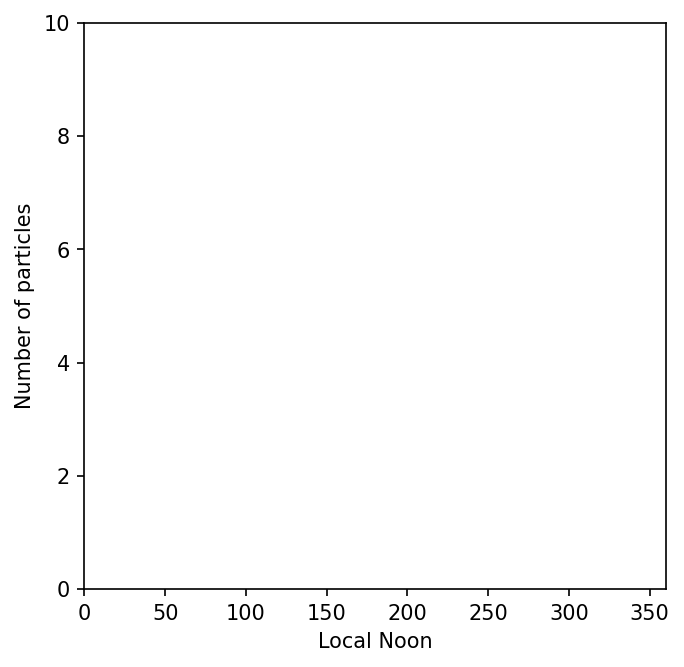

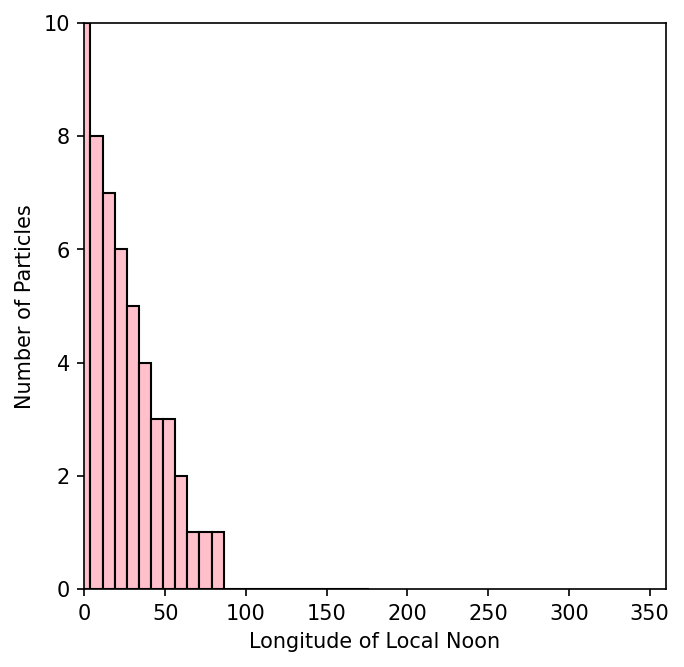

In [8]:
# Establish plotting
# What matters?

#particles which survive the day

#what the moon would look like observed at each hour

#number cold trapped (polar, not night time. )

#amount behind/at each terminator (longitude or time of day distribution)

#particles that survive per timestep

plt.figure(figsize=(5, 5), dpi=150)
plt.hist(results[:, 4, :])
plt.ylabel('Number of particles')
plt.ylim((0, n))
plt.xlabel('Local Noon')
plt.xlim((0, 360))
plt.show()



# How many particles
local_noons = np.arange(0, 360, 7.5)

plt.figure(figsize=(5, 5), dpi=150)
for i in range(int(t/dt)):
    if i > 0:
        mask = np.isnan(results[:, 4, i])
        adj = results[:, 4, i]
        adj[mask] = 1
        hists = np.nansum(adj)
    else:
        hists = np.nansum(results[:, 4, i])
    plt.bar(local_noons[i], n-hists, width=7.5, align='center', edgecolor='k', color='pink')
plt.ylabel('Number of Particles')
plt.xlabel('Longitude of Local Noon')
plt.ylim((0, n))
plt.xlim((0, 360))
plt.show()




#def output_plots():
    
    
# I want to plot: 
## number of particles vs timestep


## final position latitude and longitude map (unclear how to do this)
    


In [4]:
# Run code
# output format:
"""
particle number 1,  [latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step], [timesteps]
2, [above], [timesteps]
3, [], [timesteps]
..., [], [timesteps]
n, [], [timesteps]

"""


'\nparticle number 1,  [latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step], [timesteps]\n2, [above], [timesteps]\n3, [], [timesteps]\n..., [], [timesteps]\nn, [], [timesteps]\n\n'

[ 50  60  70  80  90 100 110 120 130 140 150 160 170 180 190 200 210 220
 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390]


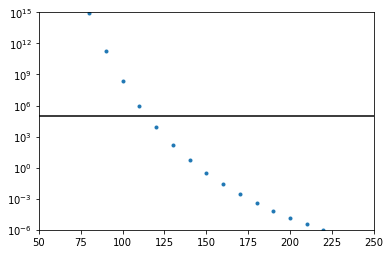

In [18]:
# Save results
R_bar = pr.R/(pr.m_H2O/1000)
pMass = pr.mass
Trange = np.arange(50, 400, 10)
surftimes = pr.surftime(R_bar, Trange, pMass)
print(Trange)
plt.plot(Trange, surftimes, '.')
plt.yscale('log')
plt.hlines(pr.sec_per_hour_M, 50, 400, colors='k')
plt.xlim((50, 250))
plt.ylim((10**(-6), 10**(15)))
plt.show()

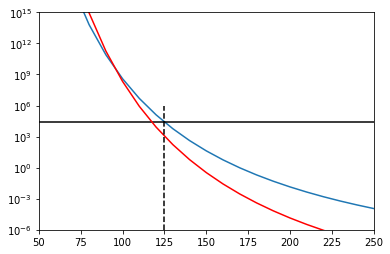

In [44]:
# Save plots
u0 = 6.64*10**(-20) #J
t0 = 5*10**(-13) # s

def steckloff(u, t0, T):
    return t0*np.exp(u/(pr.kb*T))

plt.plot(Trange, steckloff(u0, t0, Trange))
plt.yscale('log')
plt.hlines(pr.sec_per_hour_M*0.25, 50, 400, colors='k')
plt.plot(Trange, surftimes, c='r')
plt.vlines(125, 10**(-6), 10**(6), colors='k', linestyle='dashed')
plt.xlim((50, 250))
plt.ylim((10**(-6), 10**(15)))
plt.show()


In [3]:
# establish particles

particles = np.zeros((n, 3)) # latitude, longitude,  tod
particles[:, 0] = np.deg2rad(random.choices(range(-90, 90), k=n)) # latitude in degrees
particles[:, 1] = np.deg2rad(random.choices(range(0, 360), k=n)) # longitude in degrees
particles[:, 2] = (12+(((np.rad2deg(particles[:, 1]-local_noon))*24)/360))%24 # tod, based on where local noon is


In [4]:
# run
results = np.zeros((n, 8, int(t/dt)))

# start timer
st = time.time()

# Run model for n particles, 1 lunar day time step 1/2 hr (lunar)
for i in range(0, n, 1):
    results[i, :, :] = pr.Model_MonteCarlo(particles[i, :], dt, t, local_noon)
    if i % 10 ==0:
            print('particle', i)

print('Total simulation time: %2.1f'%(time.time() - st))

print('Lunar time step: %3.2e'%(pr.sec_per_hour_M*dt))

particle 0


/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:206: RuntimeWarning: invalid value encountered in sqrt
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax
/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Codes/lunar_processes.py:206: RuntimeWarning: invalid value encountered in arcsin
  t =  ((v/np.abs(v))*(np.sqrt(u*v)/b + l/(2*b)*((1/np.sqrt(-b))*np.arcsin(p)))) # at hmax


particle 10
particle 20
lacking tod data, expanding search
particle 30
lacking tod data, expanding search
particle 40
particle 50
particle 60
particle 70
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
49.57190947400281 89.7492179624647 6.9857702274717965
particle 80
particle 90
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
14.39852157672176 165.23054807002 11.020638305486951
particle 100
particle 110
particle 120
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
particle 130
lacking tod data, expanding search
particle 140
particle 150
particle 160
particle 170
lacking tod data, expanding search
lacking tod data, expanding search
lacking tod data, expanding search
particle 180
particle 190
particle 200
particle 210
particle 220
particle 230
particle 240
lacking tod data, expanding search
particle 250
particle 260
part

KeyboardInterrupt: 

In [28]:
header = "latitude, longitude, time of day, temperature, condition, tot time/step, hops per timestep, distance/step"

loc = '/Users/laferrierek/Box Sync/Desktop/Research/Moon_Transport/Writing/Proposals/'
# write file to .npy, .fits, .txt and .dat

np.save(loc+'testrun3.npy', results)

from astropy.io import fits
hdu = fits.PrimaryHDU(results)
#hdul = fits.HDUList([hdu])
#hdul.writeto('new1.fits')
hdu.writeto(loc+'testrun3.fits')

#np.savetxt(loc+'testrun1.txt', results, delimiter=',')

f=open(loc+"testrun3.dat","wb")

f.write(results)

f.close()

In [9]:
print('Latitude: %2.0f, Longitude: %2.0f' %(np.rad2deg(results[1, 0, 0]), np.rad2deg(results[1, 1, 0])))

Latitude: 18, Longitude: 351


In [10]:
# for continue:
#Total simulation time: 312.8
#Lunar time step: 5.32e+04
    
# what does this mean?
# Avg ~31 seconds per particle
# Step ran every half lunar hour

# for conditions = False:
# prints lacking tod data more often. 
#Total simulation time: 533.8
#Lunar time step: 5.32e+04


# What does this suggest for larger runs?
# Max run on laptop is about 10^4, which will take a few days. Not sure on trash can or cluster

Temperature:  250
Tau_Sub: 3.3409803357598003e-09
Tau_Surf: 0.1246154537454387


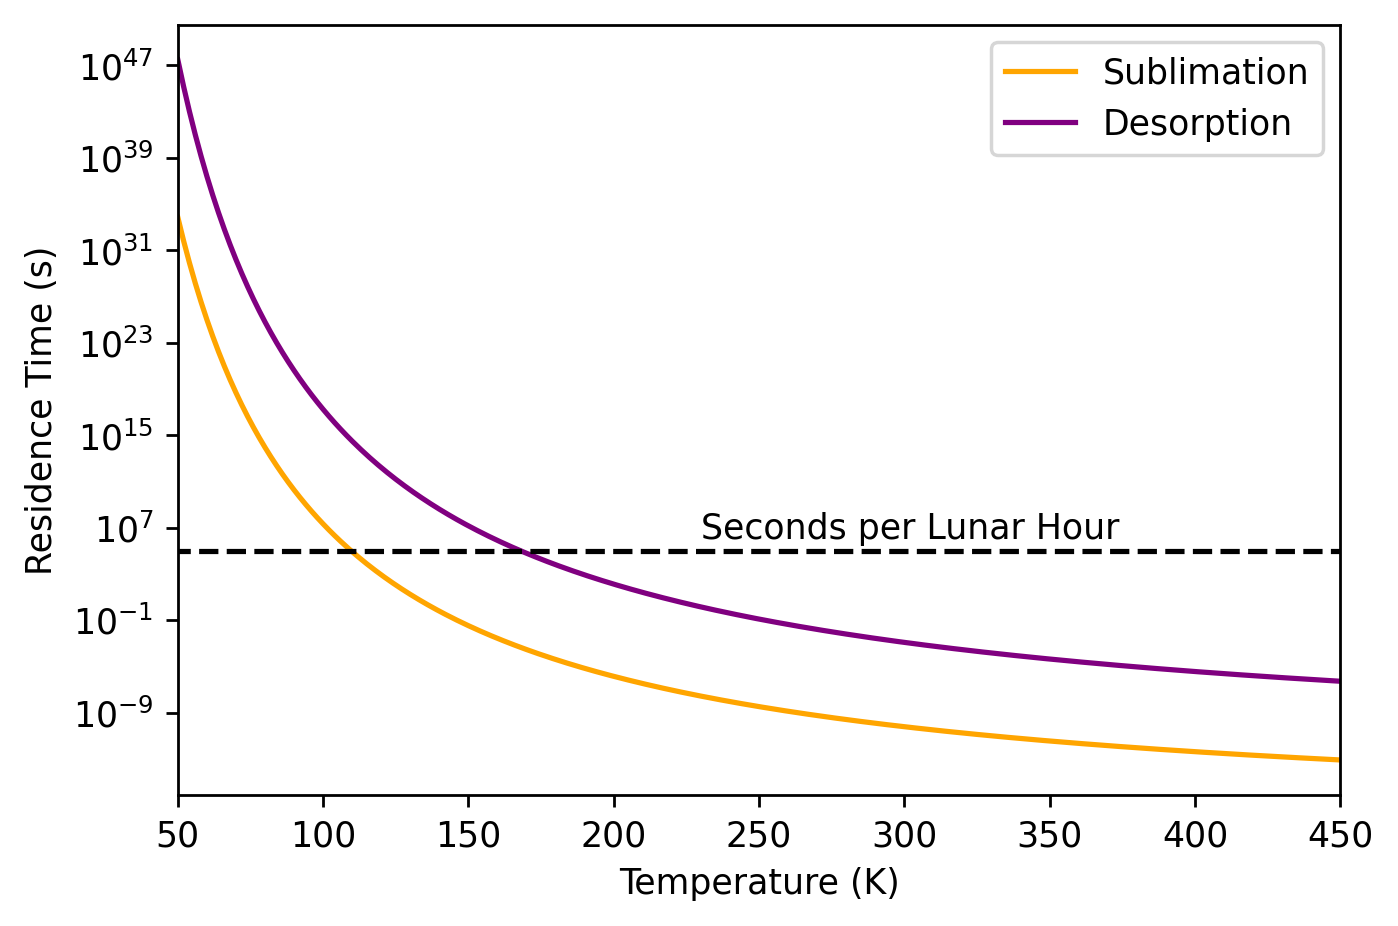

In [39]:
# compare desorption_R21 time at low Temps < ~110 K and tau_sub
# plot rates vs temperature

Temperature = np.arange(50, 450, 1)
R_bar = pr.R/(pr.m_H2O/1000)
pMass = pr.mass_H2O # kg
Ed = 0.6
tau_surf = pr.desorption_R21(Temperature, Ed)

Pv = pr.clapyeron(pr.triple_P, pr.triple_T, R_bar, pr.Lc, Temperature)
sub = pr.sublimation_surf(Pv, Temperature, pMass*pr.Avo) # kg/m2/s, mass input should be kg/mol

perc_mono = 0.001
theta_mon = 10**19 * perc_mono
tau_sub = ((theta_mon/pr.Avo)*(pr.m_H2O/1000))/sub

print("Temperature: ", Temperature[200])
print('Tau_Sub:', tau_sub[200])
print('Tau_Surf:', tau_surf[200])

plt.figure(figsize=(6, 4), dpi=250)
plt.plot(Temperature, tau_sub, c='orange', label='Sublimation')
plt.plot(Temperature, tau_surf, c='purple', label='Desorption')
plt.hlines(pr.sec_per_hour_M, 0, 500, colors='k', linestyle='dashed')
plt.annotate( 'Seconds per Lunar Hour', (230, pr.sec_per_hour_M*10.2))
plt.ylabel('Residence Time (s)')
plt.xlabel('Temperature (K)')
#plt.ylim((0, 10^10))
plt.yscale('log')
plt.xlim((50, 450))
plt.legend()
plt.show()


In [ ]:
# survival percent through time
smoothmoon = results
masks = ~np.isnan(smoothmoon[:, 4, :])
S, edgess = np.histogram(smoothmoon[:, 4, :][masks], bins=2, range=(-1, 1))
edges = np.array(edgess)[1:]

plt.figure(figsize=(5, 3), dpi= 300)
timestep = 96
for t in range(timestep):
    masks = ~np.isnan(smoothmoon[:, 4, t])
    S, edges = np.histogram(smoothmoon[:, 4, t][masks], bins=2, range=(-1, 1))
    plt.bar(t+0.5, S[1], width=1, edgecolor='k', facecolor='lightblue')

plt.yticks(np.arange(0, 1010, 100))
plt.yticks(np.arange(0, 1010, 20), minor=True)
plt.ylim((0, 1010))

plt.xticks(np.arange(-1, 96, 10))
plt.xticks(np.arange(0, 96, 2), minor=True)
plt.xlim((-1, 96))
plt.xlabel('Model timestep')
plt.ylabel('# of particles in simulation')
plt.title('Smooth Moon')

plt.tick_params(which='both', labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True, direction='in')
plt.show()
